In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
book=pd.read_csv('book.csv')
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [13]:
 pip install mlxtend

In [14]:
from mlxtend.frequent_patterns import apriori,association_rules

In [15]:
Freq_item = apriori(book,min_support=0.005, max_len=3,use_colnames = True)
Freq_item.shape

(224, 2)

### Most frequent items on basis of support

In [16]:
Freq_item.sort_values('support', ascending = False, inplace = True)

<ipython-input-18-981c15d9e7b4>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x=list(range(1,11)), height = Freq_item.support[1:11], color = 'rgmyk');


Text(0, 0.5, 'support')

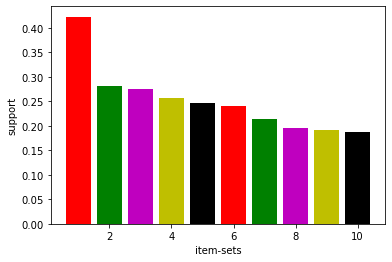

In [18]:
plt.bar(x=list(range(1,11)), height = Freq_item.support[1:11], color = 'rgmyk');
plt.xlabel('item-sets'); plt.ylabel('support')


In [19]:
rules = association_rules(Freq_item,metric = 'lift', min_threshold = 1 )
rules.shape

(1054, 9)

#### number of rules at 0.005 is 1054

In [20]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
5,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
6,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875
7,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
9,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770


#### checking with support value 0.010

In [21]:
Freq_item2 = apriori(book,min_support=0.010, max_len=3,use_colnames = True)
Freq_item.shape

Freq_item2.sort_values('support', ascending = False, inplace = True)
rules2 = association_rules(Freq_item2, metric = 'lift', min_threshold = 1)
rules2.shape

(962, 9)

#### With support value 0.010 we get 962 rules

In [22]:
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
3,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
5,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
6,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875
7,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
9,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770


<ipython-input-23-a0c041f5cfc6>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x=list(range(1,11)), height = rules2.support[1:11], color = 'rgmyk');


Text(0, 0.5, 'support')

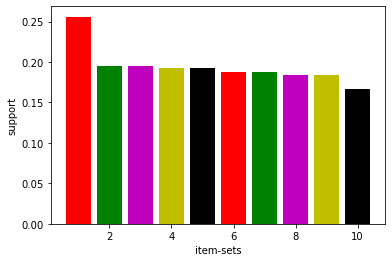

In [23]:
plt.bar(x=list(range(1,11)), height = rules2.support[1:11], color = 'rgmyk');
plt.xlabel('item-sets'); plt.ylabel('support')

#### Changing support values, number of rules changes but the top 10 rules reminded same in all scenarios

## Association rule on movies data

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

In [8]:
movie=pd.read_csv('my_movies.csv')
movie.head(10)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [9]:
movie=movie.iloc[:,5:14]
movie

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart
0,1,0,1,1,0,1,0,0,0
1,0,1,0,0,1,0,0,0,1
2,0,0,1,0,0,1,0,0,0
3,1,1,0,0,1,0,0,0,0
4,1,1,0,0,1,0,0,0,0
5,1,1,0,0,1,0,0,0,0
6,0,0,0,1,0,0,1,0,0
7,0,1,0,0,1,0,0,0,0
8,1,1,0,0,1,0,0,0,0
9,1,1,0,0,0,0,0,1,0


In [13]:
Freq_item = apriori(movie,min_support=0.005, max_len=3,use_colnames = True)
Freq_item.shape

(30, 2)

#### Most frequent item on basis of support

<ipython-input-14-33bba0e0499c>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x=list(range(1,11)), height = Freq_item.support[1:11], color = 'rgmyk');


Text(0, 0.5, 'support')

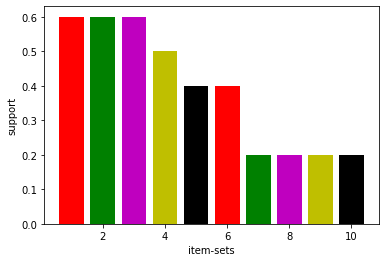

In [14]:
Freq_item.sort_values('support', ascending = False, inplace = True)
import matplotlib.pyplot as plt
plt.bar(x=list(range(1,11)), height = Freq_item.support[1:11], color = 'rgmyk');
plt.xlabel('item-sets'); plt.ylabel('support')

In [15]:
rules = association_rules(Freq_item,metric = 'lift', min_threshold = 1 )
rules.shape

(62, 9)

#### number of rules at 0.005 support = 124

In [16]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
3,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


#### Checking with support value = 0.010

In [17]:
Freq_item2 = apriori(movie,min_support=0.010, max_len=3,use_colnames = True)
Freq_item.shape

(30, 2)

<ipython-input-51-768bdaa6d1f1>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x=list(range(1,11)), height = Freq_item2.support[1:11], color = 'rgmyk');


Text(0, 0.5, 'support')

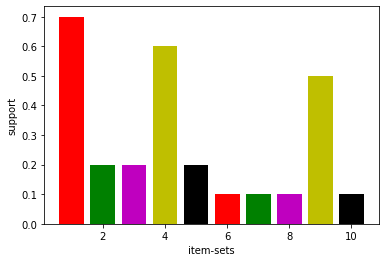

In [51]:

plt.bar(x=list(range(1,11)), height = Freq_item2.support[1:11], color = 'rgmyk');
plt.xlabel('item-sets'); plt.ylabel('support')

In [18]:
Freq_item2.sort_values('support', ascending = False, inplace = True)
rules2 = association_rules(Freq_item2, metric = 'lift', min_threshold = 1)
rules2.shape

(62, 9)

#### With support value 0.010 we get 124 rules

In [19]:
rules2.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
3,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


#### Checking with support value 0.020

In [20]:
freq_item3 = apriori(movie,min_support = 0.020, max_len = 4, use_colnames = True)
freq_item3.shape

(31, 2)

<ipython-input-22-a2db40800022>:1: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x=list(range(1,11)), height = freq_item3.support[1:11], color = 'rgmyk');


Text(0, 0.5, 'support')

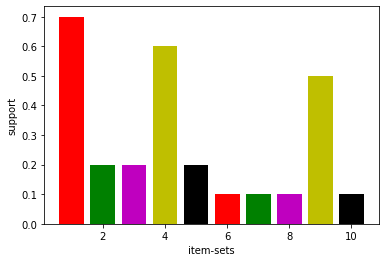

In [22]:
plt.bar(x=list(range(1,11)), height = freq_item3.support[1:11], color = 'rgmyk');
plt.xlabel('item-sets'); plt.ylabel('support')

In [23]:
freq_item3.sort_values('support', ascending = False, inplace = True)
rules3 =  association_rules(freq_item3, metric = 'lift', min_threshold = 1)
rules3.shape

(76, 9)

#### with support value 0.020 it gives 208 rules

In [26]:
rules3.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
3,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
8,"(Patriot, Gladiator)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
9,(Sixth Sense),"(Patriot, Gladiator)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


### Changing support values,number of rules changes but the top 10 rules remained same in all scenarios